In [1]:
# set things up for inline plotting
%matplotlib notebook

In [2]:
# import standard stuff
import numpy as np
import matplotlib.pyplot as plt

# import geomag_imp
import geomag_imp

In [95]:
# create simple secs above and below Earth's surface
lats = np.array([90])
lons = np.array([0])
rads = np.array([6378000 + 100000])
secs_llr = np.array(zip(lats, lons, rads))
secs = geomag_imp.secs(secs_llr)

<IPython.core.display.Javascript object>


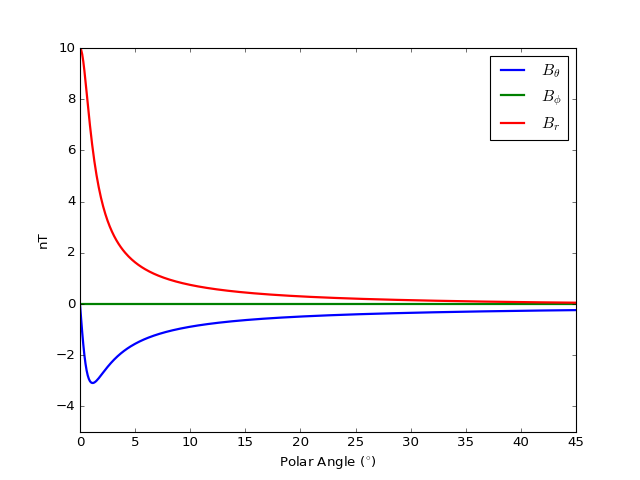

In [96]:
# predict B-field at Earth's surface (like Figure 2 in A&V-1999)
secsR = geomag_imp.secsRegressor(secs, 0)
lats = np.linspace(90,0,901)
lons = np.zeros(lats.shape)
rads = np.zeros(lats.shape) + 6378000
pred_llr = np.array(zip(lats, lons, rads))
amps = 1e4
pred = secsR.predict(pred_llr, amps)

plt.figure()
plt.plot(90-lats, pred * 1e9, linewidth=2)
plt.axis([0, 45, -5, 10])
plt.ylabel(r'nT')
plt.xlabel(r'Polar Angle ($^{\circ}$)')
plt.legend([r'$B_{\theta}$', r'$B_{\phi}$', r'$B_r$'])

In [97]:
# For unit tests
mu0 = 4 * np.pi * 1e-7 # N / A^2
Btheta90 = -(mu0 * 1e4) / (4. * np.pi * 6378000. * np.sin(np.pi/2.)) * \
        (((6378000./(6378000+100000)) - np.cos(np.pi/2)) / \
         np.sqrt(1 - (2. * 6378000. * np.cos(np.pi/2)) / (6378000+100000) + \
                 (6378000/(6378000.+100000.))**2) + np.cos(np.pi/2))
Brad0 = (mu0 * 1e4) / (4. * np.pi * 6378000.) * \
       (1. / (np.sqrt(1. - 2. * 6378000 * np.cos(0.) / (6378000.+100000) + \
                     (6378000 / (6378000.+100000.))**2)) - 1. )

print Btheta90 * 1e9
print Brad0 * 1e9

-0.110000838606
10.0


In [98]:
pred * 1e9

array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+01],
       [ -5.68702867e-01,   0.00000000e+00,   9.93668151e+00],
       [ -1.10667479e+00,   0.00000000e+00,   9.75360321e+00],
       ..., 
       [ -1.10350597e-01,   0.00000000e+00,  -4.48679460e-02],
       [ -1.10175595e-01,  -4.37905770e-34,  -4.49658169e-02],
       [ -1.10000839e-01,   0.00000000e+00,  -4.50634317e-02]])

In [107]:
# create simple secs above and below Earth's surface
lats = np.array([90])
lons = np.array([0])
rads = np.array([6378000. - 100000.])
secs_llr = np.array(zip(lats, lons, rads))
secs = geomag_imp.secs(secs_llr)

<IPython.core.display.Javascript object>


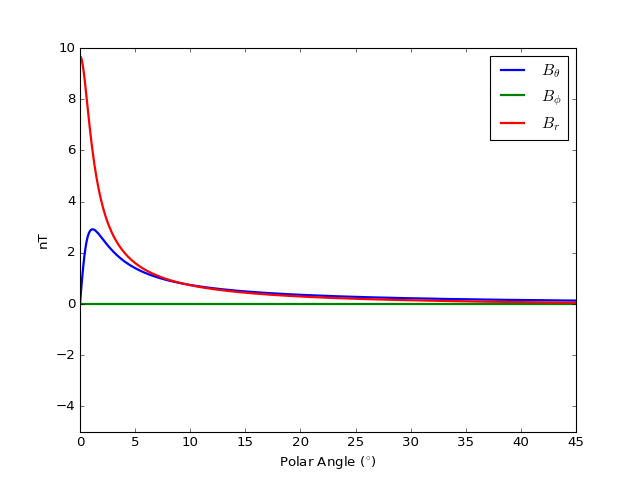

In [100]:
# predict B-field at Earth's surface (NOT like Figure 2 in A&V-1999)
secsR = geomag_imp.secsRegressor(secs, 0)
lats = np.linspace(90,0,901)
lons = np.zeros(lats.shape)
rads = np.zeros(lats.shape) + 6378000
pred_llr = np.array(zip(lats, lons, rads))
amps = 1e4
pred = secsR.predict(pred_llr, amps)

plt.figure()
plt.plot(90-lats, pred * 1e9, linewidth=2)
plt.axis([0, 45, -5, 10])
plt.ylabel(r'nT')
plt.xlabel(r'Polar Angle ($^{\circ}$)')
plt.legend([r'$B_{\theta}$', r'$B_{\phi}$', r'$B_r$'])

In [101]:
# For unit tests
mu0 = 4 * np.pi * 1e-7 # N / A^2
Btheta90 = -(mu0 * 1e4) / (4. * np.pi * 6378000. * np.sin(np.pi/2.)) * \
        ((6378000. - (6378000.-100000.) * np.cos(np.pi/2.)) / \
         np.sqrt(6378000.**2. - (2. * 6378000. * (6378000.-100000.) * np.cos(np.pi/2.)) + \
                 (6378000.-100000.)**2) - 1.)
Brad0 = (mu0 * 1e4 * (6378000.-100000.)) / (4. * np.pi * 6378000.**2) * \
       (1. / (np.sqrt(1. - 2.*(6378000.-100000.) * np.cos(0.) / 6378000. + \
                     ((6378000.-100000.)/6378000.)**2)) - 1. )

print Btheta90 * 1e9
print Brad0 * 1e9

0.0450499119332
9.68888035375


In [112]:
pred * 1e9

array([[ 0.        ,  0.        ,  9.68888035],
       [ 0.53435972,  0.        ,  9.62939413],
       [ 1.04041286,  0.        ,  9.45720487],
       ..., 
       [ 0.04523928,  0.        , -0.04415114],
       [ 0.04514449,  0.        , -0.04424748],
       [ 0.04504991,  0.        , -0.04434358]])

In [113]:
print pred_llr.shape
print secs_llr.shape

(1, 3, 901)
(1, 3, 2)


In [129]:
np.array(zip([1],[2],[3])).shape

(1, 3)

In [149]:
# create simple secs above and below Earth's surface
lats = np.array([90, 90])
lons = np.array([0, 0])
rads = np.array([6378000. + 100000., 6378000 - 100000])
secs_llr = np.array(zip(lats, lons, rads))
secs = geomag_imp.secs(secs_llr)

<IPython.core.display.Javascript object>


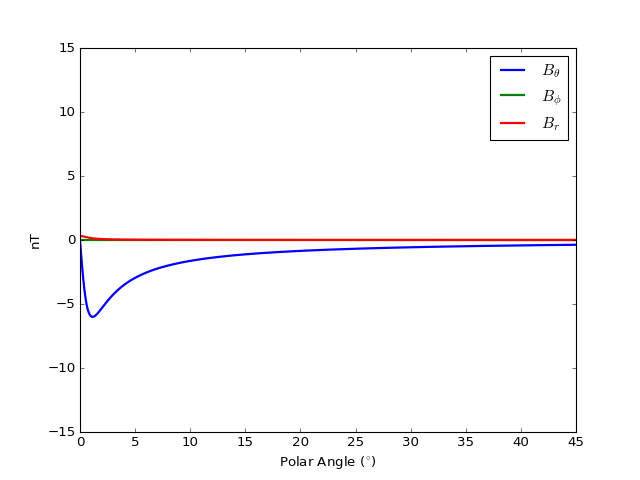

In [155]:
# predict B-field at Earth's surface (NOT like Figure 2 in A&V-1999)
secsR = geomag_imp.secsRegressor(secs, 0)
lats = np.linspace(90,0,901)
lons = np.zeros(lats.shape)
rads = np.zeros(lats.shape) + 6378000
pred_llr = np.array(zip(lats, lons, rads))
amps = np.array([1e4, -1e4])
pred = secsR.predict(pred_llr, amps)

plt.figure()
plt.plot(90-lats, pred * 1e9, linewidth=2)
plt.axis([0, 45, -15, 15])
plt.ylabel(r'nT')
plt.xlabel(r'Polar Angle ($^{\circ}$)')
plt.legend([r'$B_{\theta}$', r'$B_{\phi}$', r'$B_r$'])

In [175]:
# fit the 2-secs using perfect data
secsR.fit(pred_llr, pred)
print secsR.secs_.amps
print np.sqrt(secsR.secs_.amps_var)
print secsR.S_

[ 10000. -10000.]
[  2.86466585e+11   2.99975809e+11]
[  5.15536896e-12   2.72748777e-12]


In [182]:
print np.sum((np.eye(4) / np.array([[1,2,3,4]]))**2, axis=1)



[ 1.          0.25        0.11111111  0.0625    ]
